<a href="https://colab.research.google.com/github/lilgamergrl/CS7480/blob/main/SPARQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Getting started with SPARQL and dbpedia.org!**

***This guide is designed to get you up and running with basic queries with knowledge of more advanced query options***

Outline: <br>

1.   What is SPARQL? <br>
2.	How do you write a SPARQL query? <br>
3.	How do you interface with SPARQL?
4.	How to interface with SPARQL for non-programmers? <br>


# What is SPARQL? 

***This section will provide a brief overview of the SPARQL language, it's primary use cases, and the differences between those use cases***

1. What is SPARQL and what is it used for?   
2. What is dbpedia.org?
3.   What is the difference between Wikidata and dbpedia.org?



##What is SPARQL and what is it used for?

1. SPARQL Protocol and RDF Query Language, pronounced "Sparkle", is an RDF query language. RDF or Resource Description Framework is a system that uses a simple model to encode sematic relationships between items in datasets so that the relationships can be interpreted computationally. This framework allows the sematic query langauge SPARQL to retrieve from and manipulate data stored in the RDF format.
(We will go over RDF a bit more below)

2. The primary use case of SPARQL is for querying dbpedia.org which is a database built upon wikipedia pages.


## What is dbpedia?


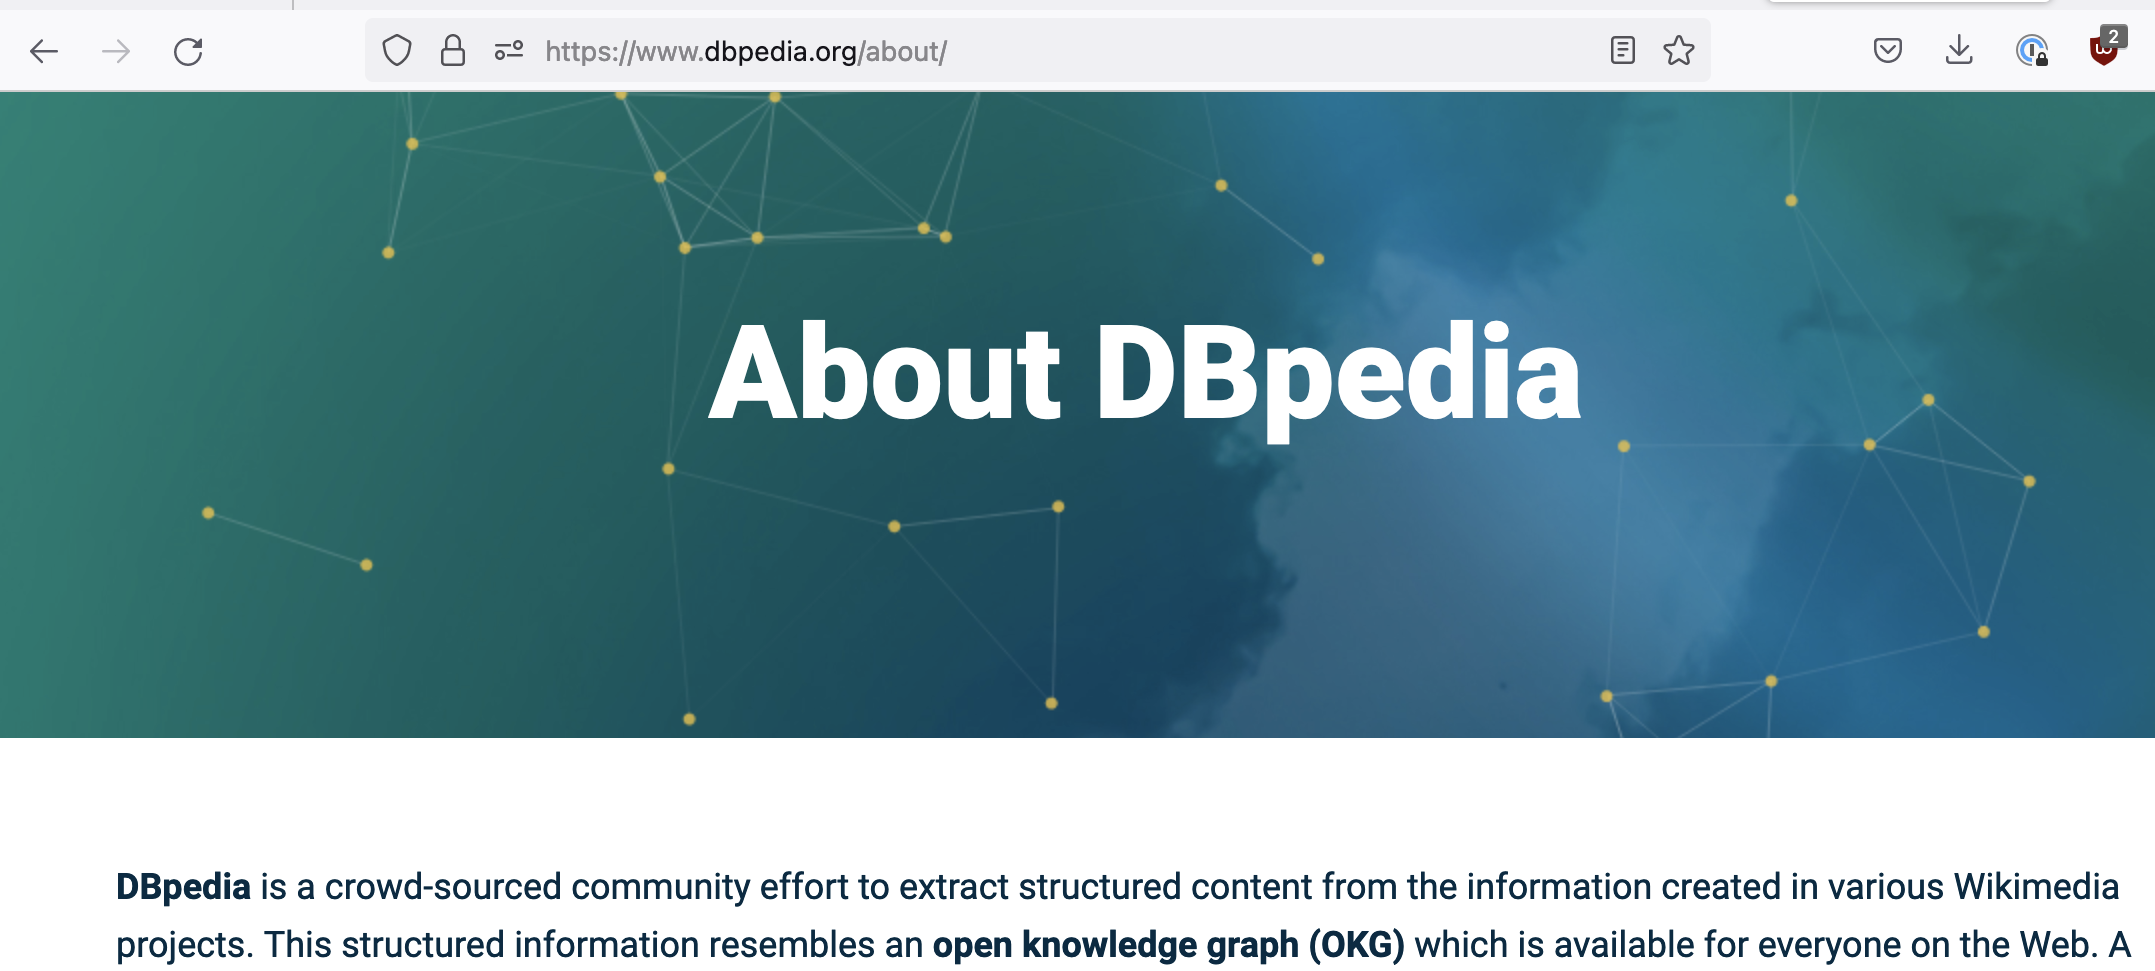

DBpedia is built upon the wikipedia page articles. The purpose of DBpedia is to create structured content from Wikipedia pages and set it up in RDF format. 


## What is the difference between WikiData and DBpedia?
The main difference between DBpedia and WikiData is that wikidata is focused on preserving correct and accurate information across different dbpedia versions while DBpedia is focused on creating entries from wikipedia pages. Wikidata can also be queries with SPARQL but since users are able to update wikidata the information may not always be accurate when compared to wikipedia in your langauage.

# How do you write a SPARQL query?
1. What is an ontolgy? 
2. Understanding a SPARQL query
3. Python Code example with SQLWRAPPER
4. SPARQL online editor example



## What is an ontology?
Ontolgies are a type of RDF vocabulary for describing people and relationships. <br>
Popular ontolgies will be linked below with the example: <br>
1. https://pokemonkg.org/ontology/index-en.html [POKEMON} <br>
2. https://www.w3.org/wiki/Good_Ontologies [FOAF OVERVIEW] <br>
3. http://xmlns.com/foaf/0.1/ [FOAF] <br>


In [ ]:
# Example of an ontolgy
query = ("""
PREFIX xsd:     <http://www.w3.org/2001/XMLSchema#>                   # These are all examples of ontologies.
PREFIX rdf:     <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs:    <http://www.w3.org/2000/01/rdf-schema#>
PREFIX owl:     <http://www.w3.org/2002/07/owl#>
PREFIX fn:      <http://www.w3.org/2005/xpath-functions#>
PREFIX apf:     <http://jena.hpl.hp.com/ARQ/property#>
PREFIX dc:      <http://purl.org/dc/elements/1.1/>
PREFIX poke: <https://pokemonkg.org/ontology/ontology.xml>
SELECT DISTINCT ?pokemon
WHERE
    {
        ?pokemon rdfs:dbo:wikiPageWikiLink dbr:List_of_Pokémon .
        # This will return a list of pokemon
        # In this case  the ontology rdfs is being used which is the xml data rules for this ontolgy.
    }
  """)

## Understanding a SPARQL query

Term Breakdown:<br>
RDF languages are a type of graph data that contains a subject, predicate, and object statements. (s,p,o) [in order] <br>
<br>
Resources or the links that you navigate to can be abrievated and are called URIs.<br> Ex. http://dbpedia.org/resource/Albert_Einstein> <br>
<br> Objects can be any literal (string("hello world", "pasta", integer(1,23),boolean (true/false),etc) <br>



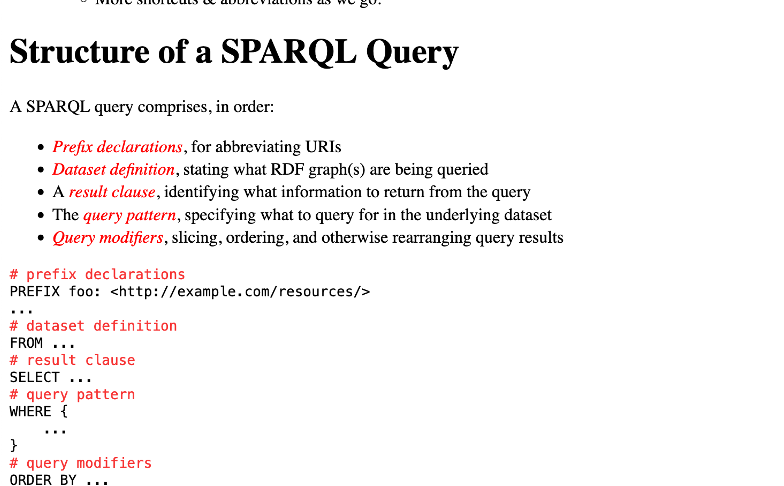

[Above picture w3 2009 linked here](https://www.w3.org/2009/Talks/0615-qbe/)


In [ ]:
# SELECT - define your variables on this line
# DISTINCT - remove duplicates
# WHERE {} - The where query needs to include at least one item to search for.
            # The syntax will be [ONTOLOGY]:[page_element_name]:element_name
# OPTIONAL - If you have a query that may not be on every page you are searching you can fill out an optional parameter.
# ORDER BY - order to return search queries

How do you find the element links? <br>
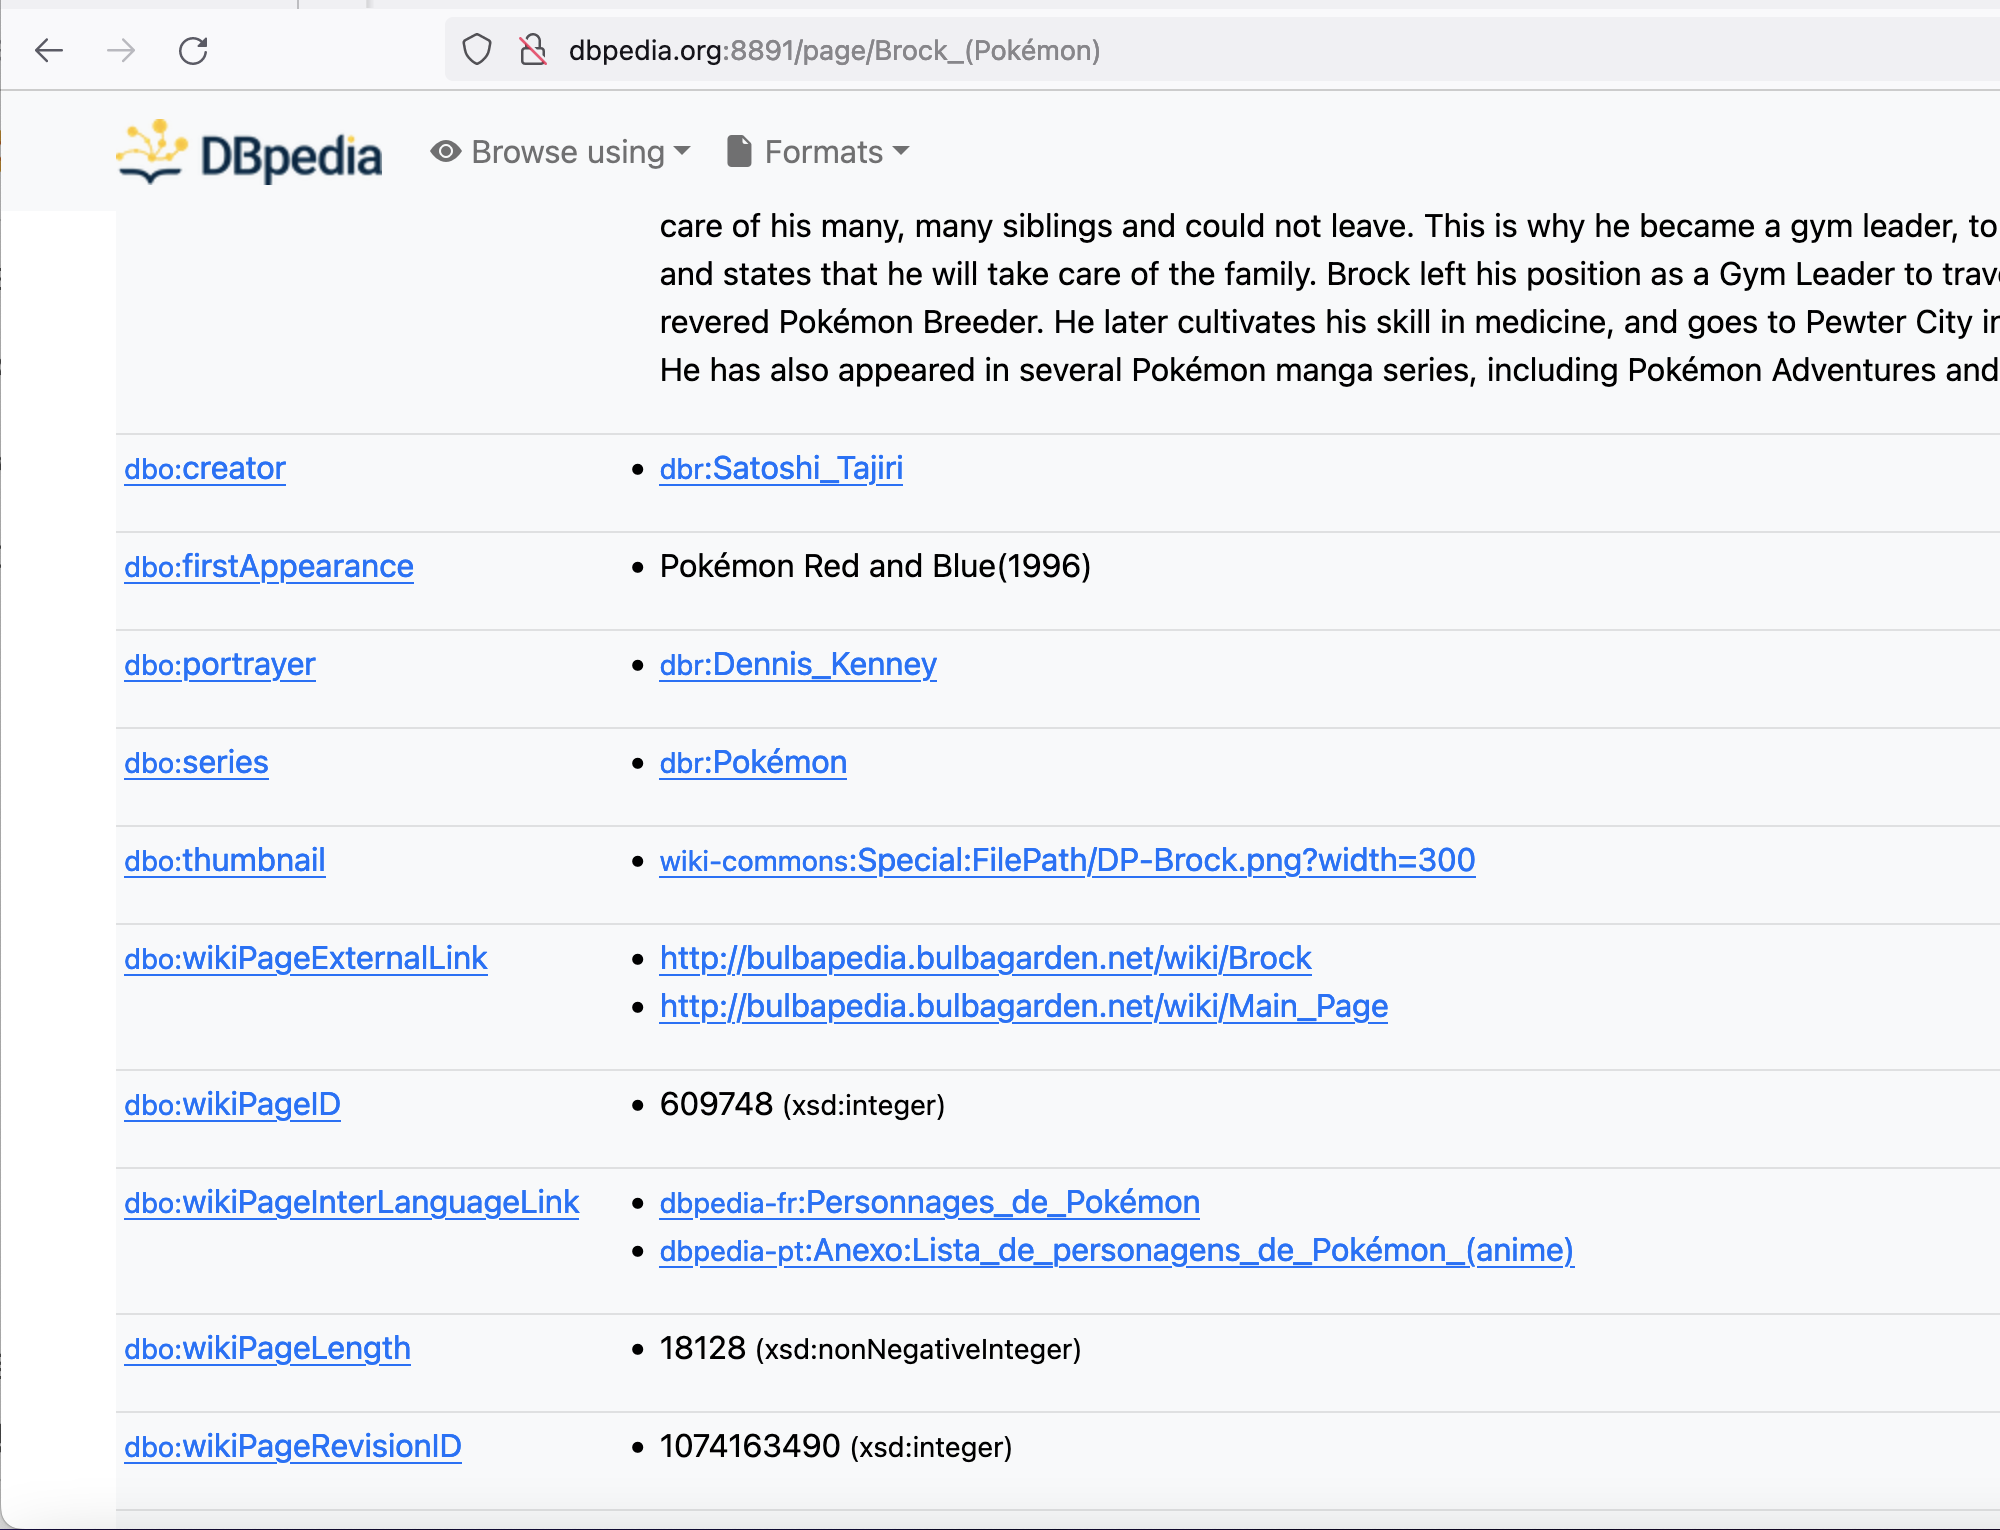

In [ ]:
# Element links can be found by looking at the page you want to search.
# WHERE {dbo:series dbr:Pokemon} will return us all pages with a similar tag.
# Take notice of the lack of the accent above pokemon. This will return different
# results as this is case sensitive.

## Python Code example with SQLWRAPPER


In [ ]:
    from SPARQLWrapper import SPARQLWrapper, JSON
    def query_dbpedia(self,query, endpoint=0):
        if endpoint == 0:
            endpoint = 'https://dbpedia.org/page/List_of_Pok%C3%A9mon'
        # PREFIX dbp:  <https://dbpedia.org/resource/>
        point = SPARQLWrapper("https://dbpedia.org")
        point.setQuery("""
        PREFIX xsd:     <http://www.w3.org/2001/XMLSchema#>
        PREFIX rdf:     <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
        PREFIX rdfs:    <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX owl:     <http://www.w3.org/2002/07/owl#>
        PREFIX fn:      <http://www.w3.org/2005/xpath-functions#>
        PREFIX apf:     <http://jena.hpl.hp.com/ARQ/property#>
        PREFIX dc:      <http://purl.org/dc/elements/1.1/>
        PREFIX poke: <https://pokemonkg.org/ontology/ontology.xml>
        SELECT DISTINCT ?pokemon    # Variables are defined here ? pokemon is a variable
        WHERE
            {
                ?pokemon rdfs:dbo:wikiPageWikiLink dbr:Adventure_film .
            }
         """)

        # This is how to return a json formatted result using the wrapper.
        # Read more here: https://sparqlwrapper.readthedocs.io/en/latest/
        point.setReturnFormat(JSON)
        try:
            ret = point.queryAndConvert()

            for r in ret["results"]["bindings"]:
                self.LINKS.append(r)
        except Exception as e:
            print(e)

# How to interface with SPARQL for non-programmers?


1.   To use SPARQL as a non-programmer you can use the SPARQL drag and drop editor! <br>
The link is below! <br>
http://www.sparqlbuilder.org/ <br>
https://waldyrious.net/sparql-query-generator/ <br>
Or give wikidata's SPARQL drag and drop tool a try!
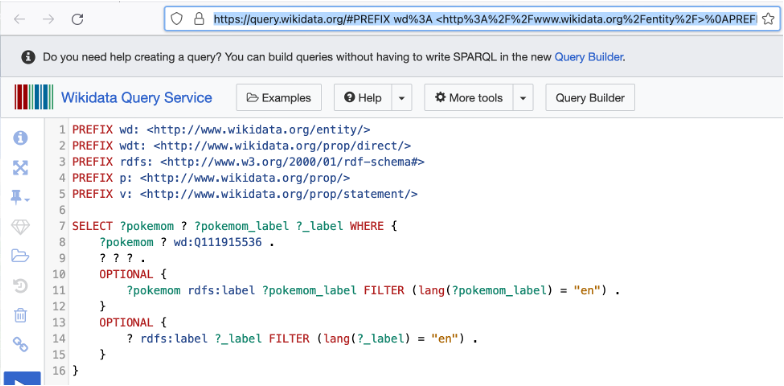


https://query.wikidata.org/querybuilder/?uselang=en

# Works Cited & Further Reading (As links)!
1. https://link.springer.com/content/pdf/10.1007/978-3-642-04930-9_19.pdf <br>

2. https://www.w3.org/2009/Talks/0615-qbe/ <br>